# Count LAT memory errors and plot errors in timespan on a map

###Robert Cameron, August 2015

In [1]:
# specify the time range for the geographic plot of LAT memory errors

start = "2019-01-01"
end = "2019-09-06"

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import time
import calendar
import re
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [3]:
cfeature.COLORS['water']

array([0.59375   , 0.71484375, 0.8828125 ])

In [4]:
cfeature.COLORS['water']=(0.06, 0.07, 0.09)

In [5]:
cfeature.COLORS['water']

(0.06, 0.07, 0.09)

In [6]:
t_start = calendar.timegm(time.strptime(start, '%Y-%m-%d'))
t_end = calendar.timegm(time.strptime(end, '%Y-%m-%d'))
# read ASCII file of LAT memory errors
err_count = {}
err_count['SIU'] = 0
err_count[('SIU','3')] = 0
err_count[('SIU','4')] = 0
err_count['EPU0'] = 0
err_count[('EPU0','3')] = 0
err_count[('EPU0','4')] = 0
err_count['EPU1'] = 0
err_count[('EPU1','3')] = 0
err_count[('EPU1','4')] = 0
err_count['3'] = 0
err_count['4'] = 0
err_count['all'] = 0
err_count_in = err_count.copy()
err_count_out = err_count.copy()
n_blank = 0
lon_in = []
lat_in = []
lon_out = []
lat_out = []
period_err = 0
with open("/Users/rac/Documents/GLAST/ISOC/LATmetrics/memerr/memerr.history") as fi:
    for line in fi:
        if not line.strip():
            n_blank += 1
            continue
        line = re.sub('[\(\)\:]',' ',line)
        ws = line.split()
        key1 = ws[0]
        key2 = (ws[0],ws[10])
        key3 = ws[10]
        err_count[key1] = err_count.get(key1, 0) + 1
        err_count[key2] = err_count.get(key2, 0) + 1
        err_count[key3] = err_count.get(key3, 0) + 1
        err_count['all'] = err_count.get('all', 0) + 1
        if float(ws[5]) > t_start and float(ws[5]) < t_end:
#            print (ws[-1])
            period_err += 1
            if int(ws[-1]) == 1:
                lon_in.append(float(ws[-3]))
                lat_in.append(float(ws[-2]))
                err_count_in[key1] = err_count_in.get(key1, 0) + 1
                err_count_in[key2] = err_count_in.get(key2, 0) + 1
                err_count_in[key3] = err_count_in.get(key3, 0) + 1
                err_count_in['all'] = err_count_in.get('all', 0) + 1
            else:
                lon_out.append(float(ws[-3]))
                lat_out.append(float(ws[-2]))
                err_count_out[key1] = err_count_out.get(key1, 0) + 1
                err_count_out[key2] = err_count_out.get(key2, 0) + 1
                err_count_out[key3] = err_count_out.get(key3, 0) + 1
                err_count_out['all'] = err_count_out.get('all', 0) + 1
fi.close()
(t_start, t_end)

(1546300800, 1567728000)

## LAT CPU MEMORY ERROR TABLES


###

|Markdown | Less | Pretty|||
|--- | :---: |:---|||
|*Still* | `renders` | **nicely**|||
|1 | 2     | 3    |||



| Tables        | :Are:           | Cool  |
| :------------- |:-------------:| -----|
| col 2 is      | :centered :     |   \$12 |
| col 3 is      | right-aligned | \$1300 |
| col 2 is      | centered      |   $1 |
| zebra stripes | are neat      |`print("%d",err[('SIU','3')])` |

$-b \pm \sqrt{b^2 - 4ac} \over 2a$



In [7]:
print (n_blank,"blank lines (1 per day)")
err = err_count
print ("LAT CPU MEMORY ERRORS\n")
print ("\nCumulative Errors\tSIU\tEPU0\tEPU1\tTotal")
print ("Single Bit\t\t%d\t%d\t%d\t%d" % (err[('SIU','3')],err[('EPU0','3')],err[('EPU1','3')],err['3']))
print ("Double Bit\t\t%d\t%d\t%d\t%d" % (err[('SIU','4')],err[('EPU0','4')],err[('EPU1','4')],err['4']))
print ("Total\t\t\t%d\t%d\t%d\t%d" % (err['SIU'],err['EPU0'],err['EPU1'],err['all']))

err = err_count_in
print ("\nCumulative Errors\tSIU\tEPU0\tEPU1\tTotal (inside the SAA, for the time period)")
print ("Single Bit\t\t%d\t%d\t%d\t%d" % (err[('SIU','3')],err[('EPU0','3')],err[('EPU1','3')],err['3']))
print ("Double Bit\t\t%d\t%d\t%d\t%d" % (err[('SIU','4')],err[('EPU0','4')],err[('EPU1','4')],err['4']))
print ("Total\t\t\t%d\t%d\t%d\t%d" % (err['SIU'],err['EPU0'],err['EPU1'],err['all']))

err = err_count_out
print ("\nCumulative Errors\tSIU\tEPU0\tEPU1\tTotal (outside the SAA, for the time period)")
print ("Single Bit\t\t%d\t%d\t%d\t%d" % (err[('SIU','3')],err[('EPU0','3')],err[('EPU1','3')],err['3']))
print ("Double Bit\t\t%d\t%d\t%d\t%d" % (err[('SIU','4')],err[('EPU0','4')],err[('EPU1','4')],err['4']))
print ("Total\t\t\t%d\t%d\t%d\t%d" % (err['SIU'],err['EPU0'],err['EPU1'],err['all']))


4034 blank lines (1 per day)
LAT CPU MEMORY ERRORS


Cumulative Errors	SIU	EPU0	EPU1	Total
Single Bit		39096	15078	43228	97402
Double Bit		711	254	956	1921
Total			39807	15332	44184	99323

Cumulative Errors	SIU	EPU0	EPU1	Total (inside the SAA, for the time period)
Single Bit		2275	874	2478	5627
Double Bit		35	15	33	83
Total			2310	889	2511	5710

Cumulative Errors	SIU	EPU0	EPU1	Total (outside the SAA, for the time period)
Single Bit		201	87	243	531
Double Bit		2	3	2	7
Total			203	90	245	538


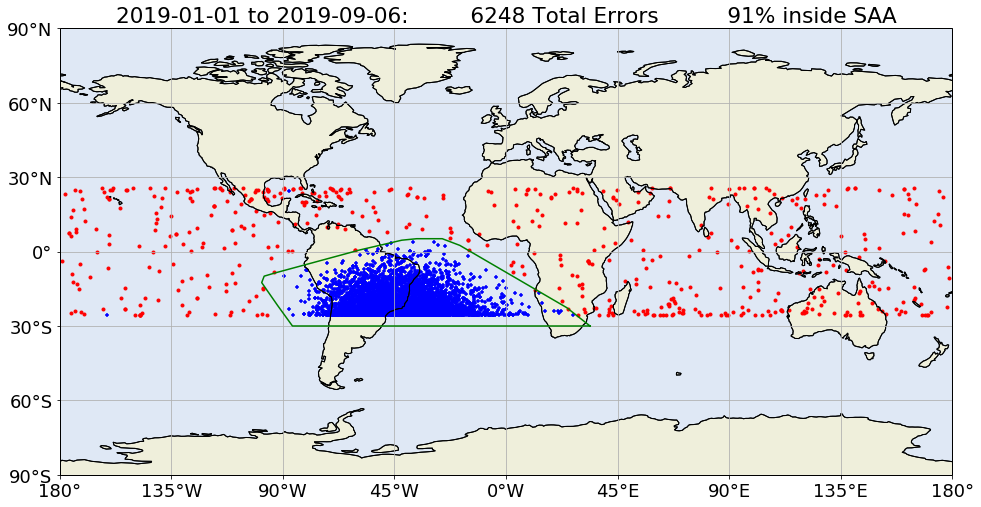

In [8]:
plt.figure(figsize = [16, 9])
plt.rc('font', size = 18)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN,alpha=0.3)
ax.add_feature(cfeature.COASTLINE)

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# draw parallels and meridians
longrid = np.arange(-180.,181.,45.)
latgrid = np.arange(-90.,91.,30.)
ax.gridlines(xlocs=longrid,ylocs=latgrid)
ax.set_xticks(longrid, crs=ccrs.PlateCarree())
ax.set_yticks(latgrid, crs=ccrs.PlateCarree())

# draw the SAA polygon
saalon = [ 33.9,  24.5, -18.6, -25.7, -36.0, -42.0, -58.8, -93.1, -97.5, -98.5, -92.1, -86.1,  33.9]
saalat = [-30.0, -22.6,   2.5,   5.2,   5.2,   4.6,   0.7,  -8.6,  -9.9, -12.5, -21.7, -30.0, -30.0]
plt.plot(saalon,saalat,color='g',linewidth=1.5,transform=ccrs.PlateCarree())
plt.scatter(lon_in,lat_in,s=15,marker='+',color='b')
plt.scatter(lon_out,lat_out,s=9,marker='o',color='r')

saapercent = 100*len(lat_in)/period_err
plt.title("%s to %s:         %s Total Errors          %d%% inside SAA" % (start,end,period_err,saapercent))
plt.show()

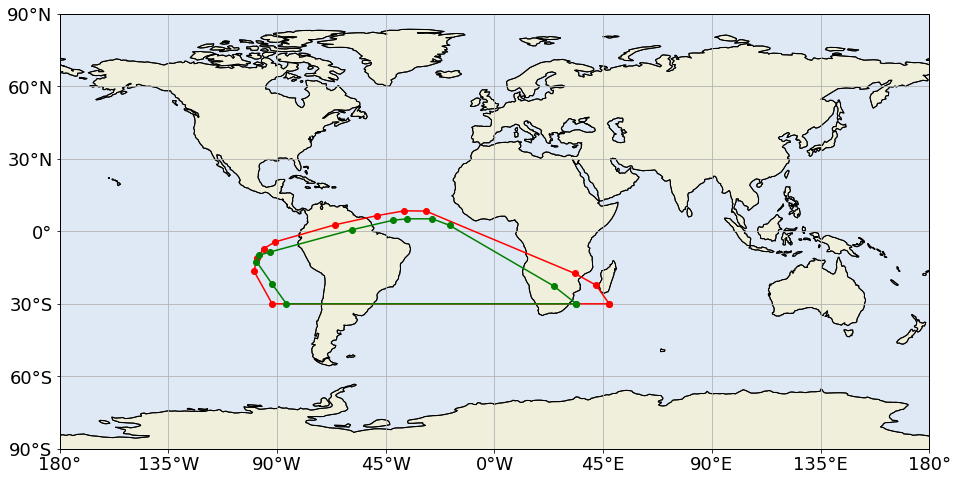

In [9]:
plt.figure(figsize = [16, 8])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#ax.stock_img()
#ax.set_global()

ax.add_feature(cfeature.OCEAN,alpha=0.3)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

# draw parallels and meridians
longrid = np.arange(-180.,181.,45.)
latgrid = np.arange(-90.,91.,30.)
ax.gridlines(xlocs=longrid,ylocs=latgrid)
ax.set_xticks(longrid, crs=ccrs.PlateCarree())
ax.set_yticks(latgrid, crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# define the LAT SAA polygon
# taken from JIRA OBCONF-47
saalon = [ 33.9,  24.5, -18.6, -25.7, -36.0, -42.0, -58.8, -93.1, -97.5, -98.5, -92.1, -86.1,  33.9]
saalat = [-30.0, -22.6,   2.5,   5.2,   5.2,   4.6,   0.7,  -8.6,  -9.9, -12.5, -21.7, -30.0, -30.0]

# define the old LAT SAA polygon
# taken from JIRA OBCONF-20
oldsaalon = [ 47.5,  42.1,  33.2, -28.4, -37.3, -48.7, -66.1, -90.9, -95.4, -98.3, -99.5, -92.0,  47.5]
oldsaalat = [-30.0, -22.3, -17.4,   8.4,   8.5,   6.5,   2.7,  -4.4,  -7.1, -11.1, -16.5, -30.0, -30.0]

plt.xlim(-180,180)
plt.ylim(-90,90)

plt.plot(oldsaalon,oldsaalat,color='r',linewidth=1.5,marker='o',transform=ccrs.PlateCarree())

#plt.plot(saalon[:-1],saalat[:-1],color='b',linewidth=1.5,marker='o',transform=ccrs.Geodetic())
plt.plot(saalon,saalat,color='g',linewidth=1.5,marker='o',transform=ccrs.PlateCarree())

plt.show()